In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("data/is_up.csv")
##df = df['stock' == ]

In [3]:
df.head()

,Unnamed: 0,title,date,stock,is_up
0,0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,0
1,1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,1
2,2,71 Biggest Movers From Friday,2020-05-26,A,1
3,3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,1
4,4,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,1


In [4]:
df.shape

(315244, 5)

In [5]:
(df["is_up"] == "Na").sum()

8751

In [6]:
df = df[df["is_up"].str.contains("Na")==False]

In [7]:
df.shape

(306493, 5)

In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
date          0
stock         0
is_up         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()
df.shape

(306493, 5)

In [11]:
df.is_up.value_counts()

1    161781
0    143119
2      1593
Name: is_up, dtype: int64

In [12]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

In [13]:
# Break words into their stem words

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 


In [14]:
# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

In [15]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = stem_words(input_string)
    return input_string

In [16]:
df["title_clean"] = df["title"].apply(text_pipeline)

In [17]:
df.head()
df = df.drop(columns="Unnamed: 0")

In [18]:
#c1 = df['is_up'] == '0'
#df['Sentiment'] = np.where( c1, "Negative", "Positive",)
#df.head()

In [19]:
# delete all the rows that contain Na and 2 in is_up
df = df [df ["is_up"].str.contains("Na")==False] 
df

,title,date,stock,is_up,title_clean
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,0,stock that hit 52week high on friday
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,1,stock that hit 52week high on wednesday
2,71 Biggest Movers From Friday,2020-05-26,A,1,71 biggest mover from friday
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,1,46 stock move in friday midday session
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,1,b of a secur maintain neutral on agil technolo...
...,...,...,...,...,...
315228,Hilliard Lyons Initiates Coverage on Zoetis at...,2013-03-12,ZTS,0,hilliard lyon initi coverag on zoeti at neutral
315229,Hilliard Lyons Initiates Coverage on Zoetis at...,2013-03-12,ZTS,0,hilliard lyon initi coverag on zoeti at neutral
315230,UPDATE: BMO Capital Markets Initiates Zoetis a...,2013-03-08,ZTS,0,updat bmo capit market initi zoeti at underper...
315231,BMO Capital Initiates Coverage on Zoetis at Un...,2013-03-08,ZTS,0,bmo capit initi coverag on zoeti at underperfo...


In [20]:
df['Sentiment'] = df['is_up']
df['Sentiment'] = df['Sentiment'].replace(['0'], 'Negative')
df['Sentiment'] = df['Sentiment'].replace(['1'], 'Positive')
df['Sentiment'] = df['Sentiment'].replace(['2'], 'Bullish')
df.head()

,title,date,stock,is_up,title_clean,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,0,stock that hit 52week high on friday,Negative
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,1,stock that hit 52week high on wednesday,Positive
2,71 Biggest Movers From Friday,2020-05-26,A,1,71 biggest mover from friday,Positive
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,1,46 stock move in friday midday session,Positive
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,1,b of a secur maintain neutral on agil technolo...,Positive


In [21]:
# replacing(x):
   # if x == 2:
        #return 'Bullish'
    #elif x == 1:
        #return 'Positive'
    #elif x == 0:
       # return 'Negative'
    #else:
       # return x #needed in case you have a 3

#df['is_up'] = df['is_up'].apply(replacing)
#df

In [22]:
df.is_up.value_counts()

1    161781
0    143119
2      1593
Name: is_up, dtype: int64

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
X = df['title']
y = df['Sentiment']

vect=CountVectorizer()
vect.fit(X)
count_vect_trans = vect.transform(X)
count_vect_trans

<306493x50291 sparse matrix of type '<class 'numpy.int64'>'
	with 3446163 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vect = TfidfTransformer()
x_train_tfidf = tfidf_vect.fit(count_vect_trans)
x_train_tfidf_trans = x_train_tfidf.transform(count_vect_trans)

In [25]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    x_train_tfidf_trans, y, test_size=0.2, random_state=1)

In [26]:
Model_NB = MultinomialNB().fit(x_train_tfidf_trans,y)

print(Model_NB.predict(vect.transform(["Good Good Good"])))

['Positive']


In [27]:
# Make new predictions of our testing data. 
y_pred = Model_NB.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = Model_NB.predict_proba(X_test)

# Evaluate our model
accuracy =  Model_NB.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.650060


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=Model_NB.classes_))

              precision    recall  f1-score   support

     Bullish       0.00      0.00      0.00       313
    Negative       0.71      0.44      0.55     28672
    Positive       0.63      0.84      0.72     32314

    accuracy                           0.65     61299
   macro avg       0.44      0.43      0.42     61299
weighted avg       0.66      0.65      0.63     61299



C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


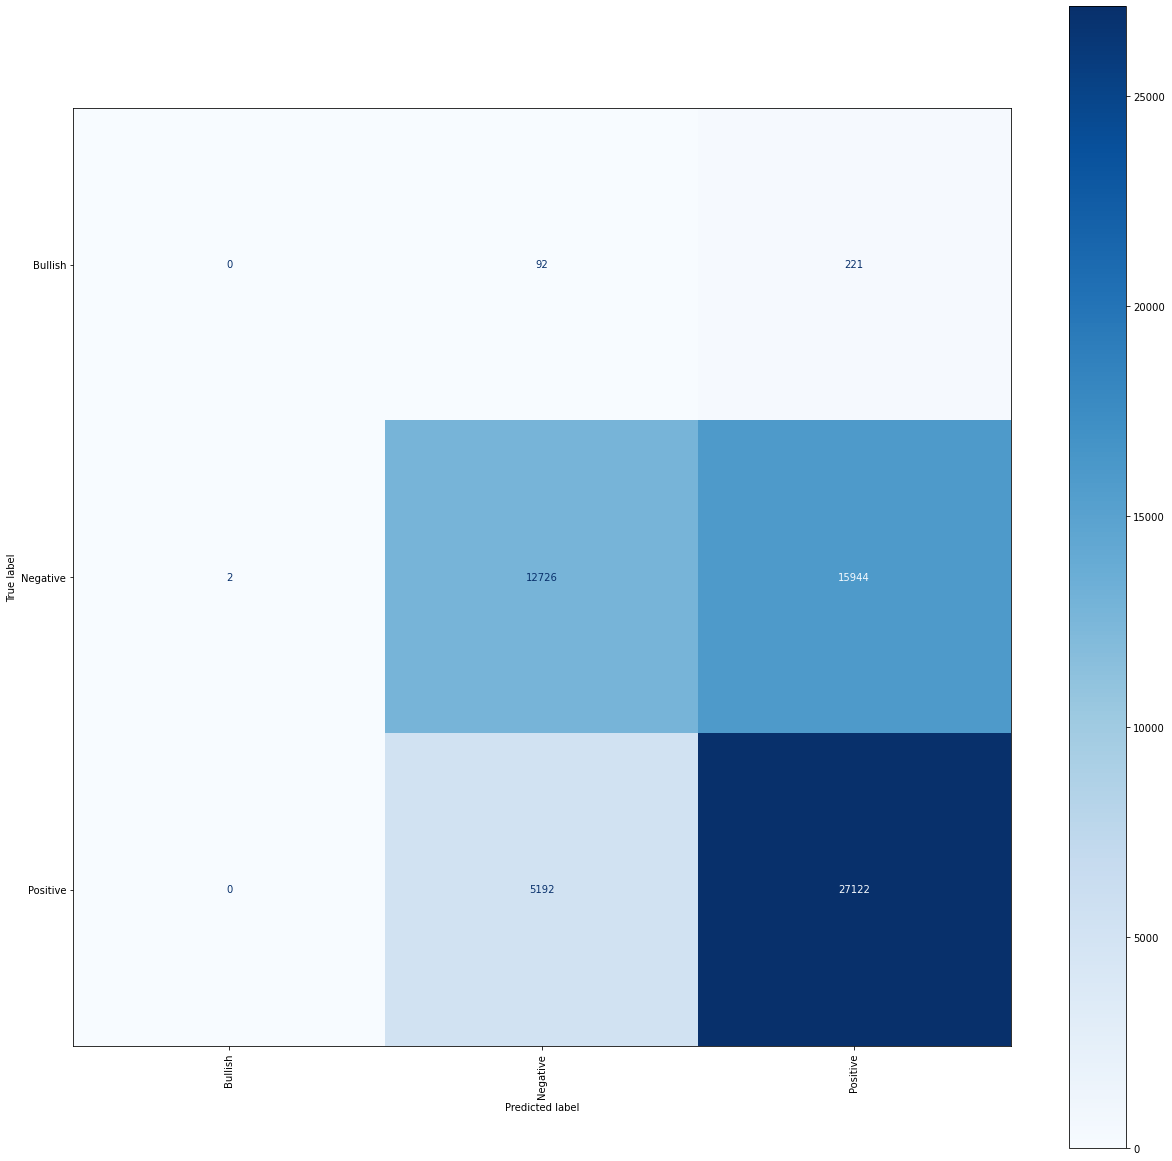

In [29]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(Model_NB, X_test, y_test,
                             display_labels=Model_NB.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [30]:
#We tried RandomForestClassifie, As this model needs a lot of computing ti and our local machine was not able to handle the same. Hence, we are just sharing the codes.

#rf_model = RandomForestClassifier()


# Fit our model with our training data.
#rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
#y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
#y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
#accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
#print("Model Accuracy: %f" % accuracy)

#print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

In [31]:
pickle.dump(vect,open('Vetorizer.pkl', 'wb'))
pickle.dump(Model_NB, open('Stock_Prediction.pkl', 'wb'))